**ISDS 7070 - Course Project**
Keilon Hill, David Nguyen, Shelby LeBlanc, Hamzah Alkhatib

**Citations:** <br>
TheDevastator. (n.d.). Jobs dataset from Glassdoor [Data set]. Kaggle. https://www.kaggle.com/datasets/thedevastator/jobs-dataset-from-glassdoor

# Problem Summary:
The primary objective of this project is to explore the variables that affect the salaries of data scientists using data from Glassdoor. By accurately estimating salaries and evaluating which attributes most influence salary amount, we aim to provide insights into salary expectations and trends for data science professionals. 

**Nuances:** 
Salaries are subjective. Salary amount can be influenced by numerous variables such as location, company size, industry, and job experience, and salary can even vary within the same company or position. The model we aim to create must account for these variations to make accurate predictions. 

**Success Measurement:**
The success of our model will be measured using Mean Absolute Error (MAE) and Mean Squared Error (MSE). In salary prediction: 
- MAE provides a straightforward interpretation of prediction accuracy and is less sensitive to outliers. 
- MSE penalizes large errors more heavily due to the squaring operation, indicating how close the model’s predictions are to the actual salaries.

**Assumptions and Verification:** 
<br>Assumptions:
- Data Representativness: We assume that the dataset from Glassdoor is a fair representation of real-world salary distributions for data scientists.
- Consistent Salary Patterns: We assume that the patterns influencing salaries remain relatively consistent during the time covered by the dataset.

Verification: 
- Cross-Validation: After splitting the data into training and validation sets, we will use techniques like k-fold-cross validation to verify the performance of the model
- Holdout Validation: We will reserve a portion of the data for final model evaluation
- Time-Based Validation: If the dataset has a temporal component, we can simulate real-world scenarios by training on older data and validating on more recent data

**Target Features:**<br>
Target Variable: The salary of data scientists is a continuous variable. Each data point will have an associated salary value. 
<br>Feature Considerations: Investigate features like job title, location, company size, industry, and level of experience. These features may exhibit different behavior in influencing salaries.

**Data Cleanliness:**<br>
- Missing Values: Check for missing data in features. Impute or drop missing values appropriately.
- Outliers: Identify extreme values that could affect model performance. Consider robust methods to handle outliers.
- Data Quality: Assess the overall cleanliness of the dataset. Inaccurate or inconsistent data can impact model results.
- Imbalanced Classes: In salary prediction, imbalanced classes may not be a primary concern. However, it is essential to ensure a balanced representation of different salary ranges to avoid bias in the model's predictions. 

# Data Wrangling:
**Tools and Methods:** <br>
Exploration and Wrangling:
- Standardizing Data: Ensuring all numerical data is on a similar scale
- Removing Outliers: Identifying and handling extreme values
- Binning or Partitioning: Grouping certain attributes to simplify model processing

Visualization: 
- Distribution Plots: To understand the distribution of salaries
- Correlation Heatmaps: To identify relationships between different features
- Box Plots: To visualize the distribution of salaries by categories such as company rating
- Bar Charts: To show the count of jobs by industry or other categorical variables

# Data Exploration

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder 
import category_encoders as ce
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
df = pd.read_csv('salary_data.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-null    int64  
 16  employer_provided  742 non

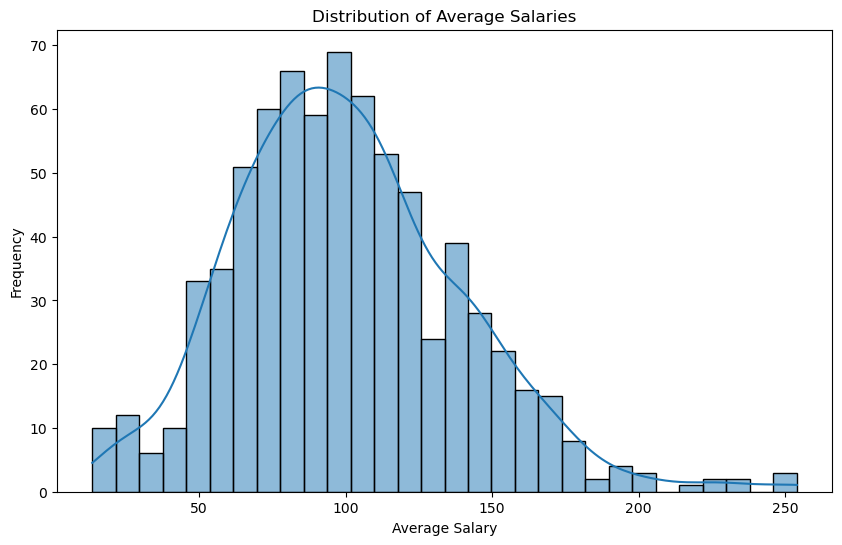

In [9]:
#Plot Distribution of Average Salaries
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_salary'], bins=30, kde=True)
plt.title('Distribution of Average Salaries')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.show()

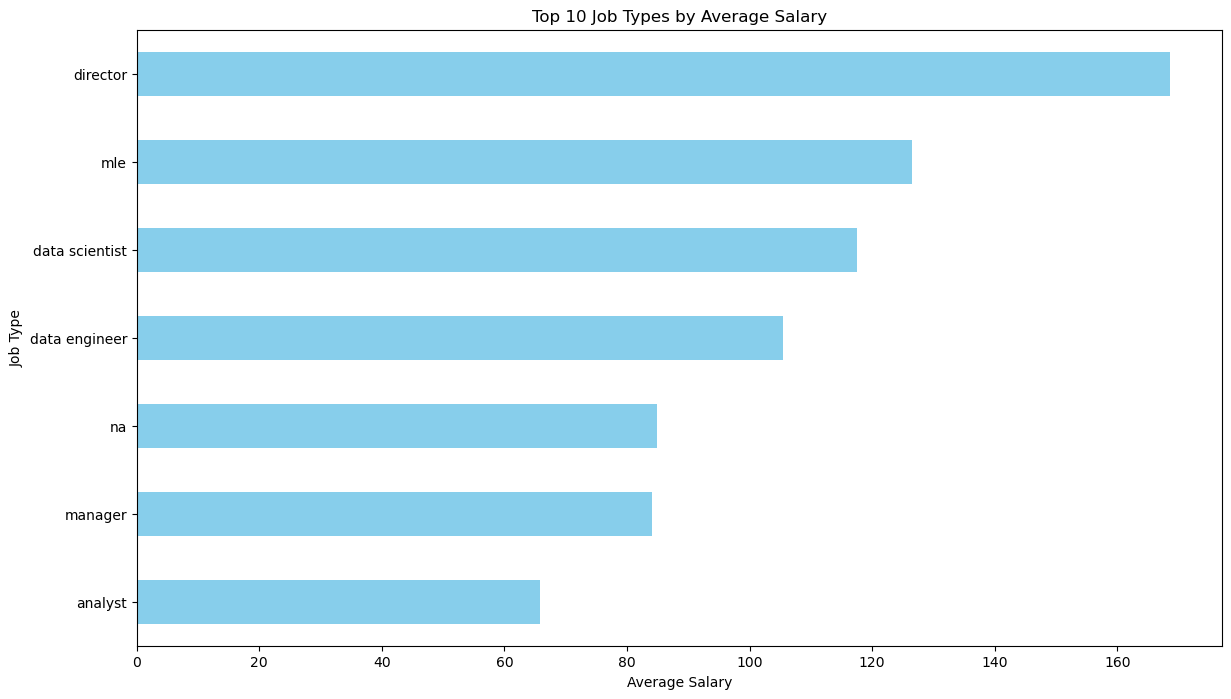

In [10]:
#Plot Top 10 Simplified Job Titles by Average Salary
plt.figure(figsize=(14, 8))
avg_salary_by_title = df.groupby('job_simp')['avg_salary'].mean().sort_values(ascending=False)[:10]
avg_salary_by_title.plot(kind='barh', color='skyblue')
plt.title('Top 10 Job Types by Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Job Type')
plt.gca().invert_yaxis()
plt.show()

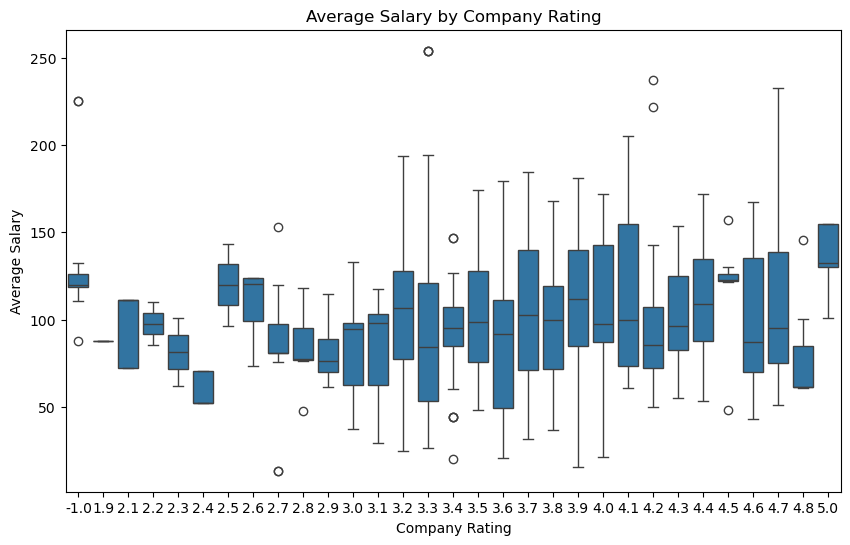

In [11]:
#Plot Average Salary by Company Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='avg_salary', data=df)
plt.title('Average Salary by Company Rating')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.show()

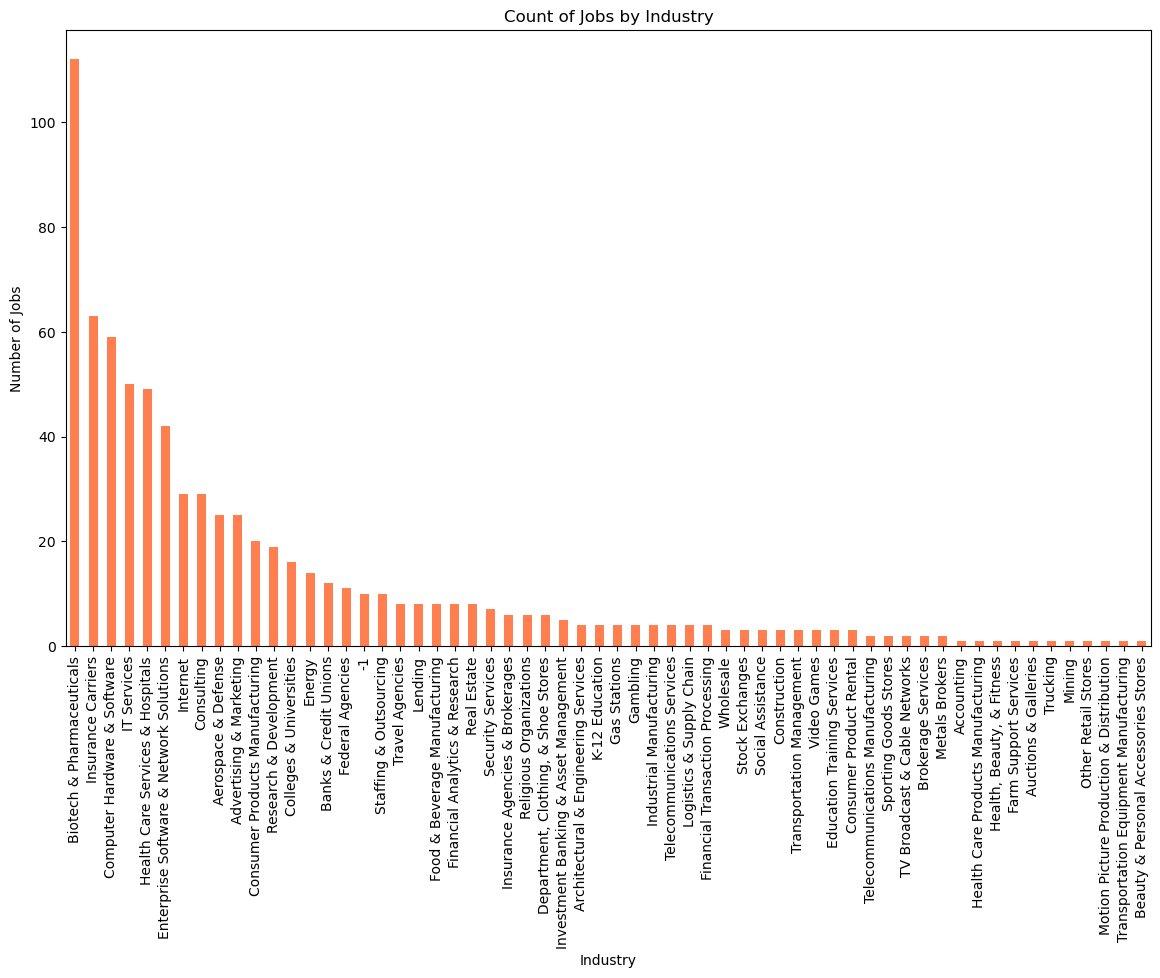

In [12]:
#Plot Count of Jobs by Industry
plt.figure(figsize=(14, 8))
df['Industry'].value_counts().plot(kind='bar', color='coral')
plt.title('Count of Jobs by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=90)
plt.show()

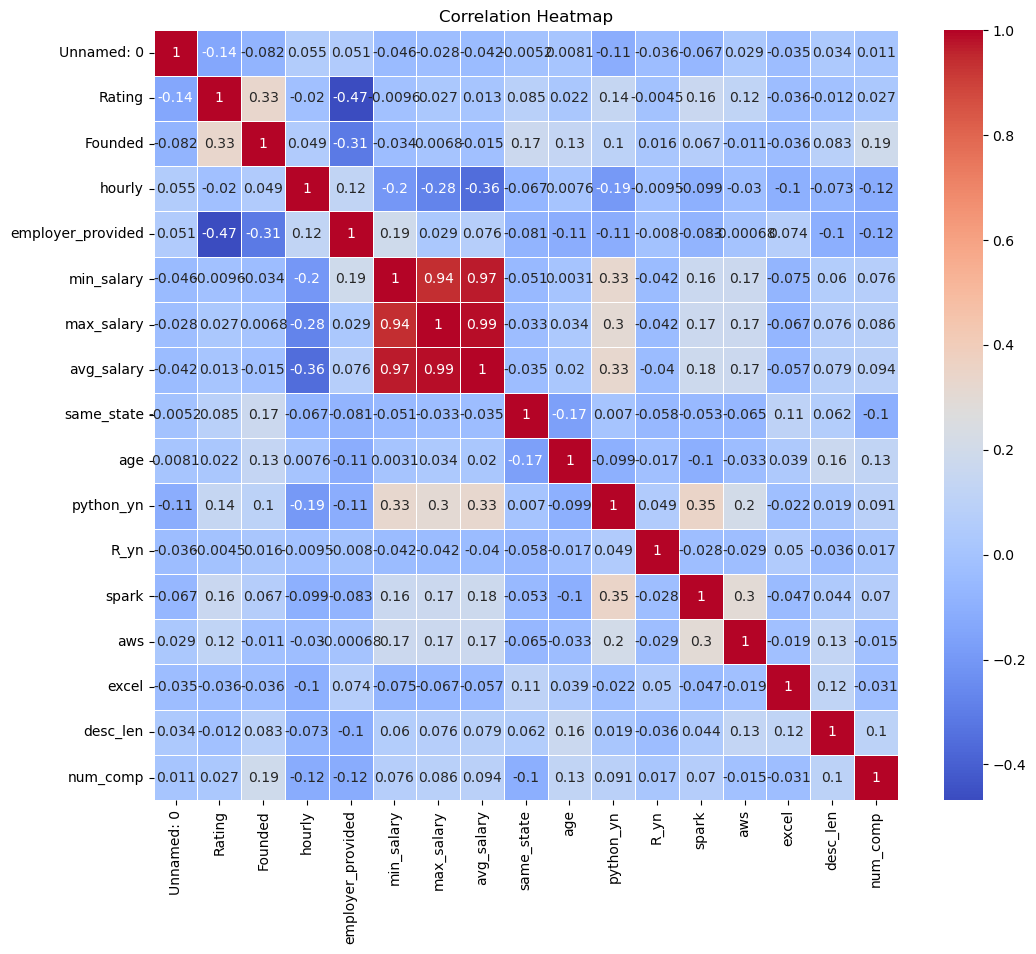

In [13]:
#Correlation Heatmap
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Initial Thoughts: 
- Based on the initial import of the Salary Data, the distribution of average salaries is skewed to the right. Many factors could explain the skew; however, the average salary looks like it has high outliers. <br>
- Based on the top 10 simplified job types, Directors, Engineers, and Scientists have the highest average salaries. These job types are typically expected to have more responsibilities and require more expertise, therefore probably require higher salaries. <br> 
- In reviewing the Correlation Heatmap, there is a slight positive correlation between experience, such as Python, and the average salary. <br>
- The Seaborn boxplot for salaries based on Company rating identifies outliers in the dataset and shows that companies rated between 3.3 and 4.7 have the largest salary ranges. <br>
- This dataset includes information on jobs mostly in the Biotech/Insurance,and IT realm, which will make the findings of our model skewed toward these industries. A Data Scientist looking for a job in Arts/Galleries will not find the model we are developing to be as useful as one searching in the industries most represented in this dataset. 

# Data Wrangling:

In [16]:
#Reimport data to maintain an untouched version of the original data
data = pd.read_csv('salary_data.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-null    int64  
 16  employer_provided  742 non

In [17]:
#Clean and process the Salary Estimate and the Company Name columns

In [18]:
def salary(x):
    try:
        a = x.split('-')
        b = int(a[0].replace('$','').replace('K','')) + int((a[1].replace('$','').split("K")[0]))/2
        return b
    except:
        try:
            a = x.replace('Employer Provided Salary:','').split('-')
            b = int(a[0].replace('$','').replace('K','')) + int((a[1].replace('$','').split("K")[0]))/2
        except:
            return ""
        return b 

In [19]:
data["Salary Estimate"] = data["Salary Estimate"].apply(lambda x: salary(x))
data["Salary Estimate"] = data["Salary Estimate"][data["Salary Estimate"] != ""]
data["Salary Estimate"] = data["Salary Estimate"].astype(float)

In [20]:
data['Company Name'] = data['Company Name'].apply(lambda x: x.split('\n')[0])
encoder = ce.OrdinalEncoder(cols=['Job Title', 'Location', 'Company Name', 'Industry', 'Sector'])
data = encoder.fit_transform(data)

In [21]:
#Adding 'experience' column as a sum of the Boolean data for the python_yn, R_yn, spark, aws, and excel columns. 
#Since '0' is false, any value in this column will represent a requirement for specific experience in the job. 

In [22]:
skills = pd.DataFrame({ 'python_yn': data['python_yn'],
          'R_yn': data['R_yn'],
          'spark': data['spark'],
         'aws':  data['aws'],
          'excel': data['excel'] })

In [23]:
data['experience']=skills.sum(axis=1).astype(int)

In [24]:
#Drop columns identified as irrelevant for developing the model
data = data.drop(['Unnamed: 0',
                  'Job Description', 
                  'Type of ownership', 
                  'excel', 
                  'spark', 
                  'Company Name', 
                  'Location', 
                  'Founded', 
                  'Competitors', 
                  'Industry', 
                  'hourly', 
                  'employer_provided', 
                  'company_txt', 
                  'job_state', 
                  'python_yn', 
                  'R_yn', 
                  'aws'], axis=1)

In [25]:
#Convert Size ranges to averages and process the Headquarters column for further analysis

In [26]:
def Size(x):
    if x == '1 to 50 employees':
        return (1+50)/2
    elif x == '51 to 200 employees':
        return (51+200)/2
    elif x == '201 to 500 employees':
        return (201+500)/2
    elif x == '501 to 1000 employees':
        return (501+1000)/2
    elif x == '1001 to 5000 employees':
        return (1001+5000)/2
    elif x == '5001 to 10000 employees':
        return (5001+10000)/2
    elif x == '10000+ employees':
        return 10000 
    else:
        return ""

In [27]:
data['Size'] = data['Size'].apply(lambda x: Size(x))
data['Size'] = data['Size'][data['Size'] != ""]
data['Size'] = data['Size'].astype(float)
encoder = ce.OrdinalEncoder(cols=['Headquarters'])
data = encoder.fit_transform(data)

In [28]:
#Convert revenue ranges to averages to process analysis on a single number

In [29]:
def Revenue(x):
    if x == 'Unknown / Non-Applicable':
        return 0
    elif x == '$1 to $2 billion (USD)':
        return (1+2)/2
    elif x == '$2 to $5 billion (USD)':
        return (2+5)/2
    elif x == '$5 to $10 billion (USD)':
        return (5+10)/2
    elif x == '$10+ billion (USD)':
        return 10
    elif x == '$100 to $500 million (USD)':
        return (100+500)/2
    elif x == '$500 million to $1 billion (USD)':
        return (500+1000)/2
    elif x == '$50 to $100 million (USD)':
        return (50+100)/2
    elif x == '$10 to $25 million (USD)':
        return (10+25)/2
    elif x == '$25 to $50 million (USD)':
        return (25+50)/2
    elif x == '$5 to $10 million (USD)':
        return (5+10)/2
    elif x == '$1 to $5 million (USD)':
        return (1+5)/2
    else:
        return ""

In [30]:
data['Revenue'] = data['Revenue'].apply(lambda x: Revenue(x))
data['Revenue'] = data['Revenue'][data['Revenue'] != ""]
data['Revenue'] = data['Revenue'].astype(float)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        742 non-null    int32  
 1   Salary Estimate  718 non-null    float64
 2   Rating           742 non-null    float64
 3   Headquarters     742 non-null    int32  
 4   Size             732 non-null    float64
 5   Sector           742 non-null    int32  
 6   Revenue          737 non-null    float64
 7   min_salary       742 non-null    int64  
 8   max_salary       742 non-null    int64  
 9   avg_salary       742 non-null    float64
 10  same_state       742 non-null    int64  
 11  age              742 non-null    int64  
 12  job_simp         742 non-null    object 
 13  seniority        742 non-null    object 
 14  desc_len         742 non-null    int64  
 15  num_comp         742 non-null    int64  
 16  experience       742 non-null    int32  
dtypes: float64(5), i

In [32]:
data.dropna(inplace=True)

In [33]:
#Standardize the data
toNumericData = data.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(toNumericData)

In [34]:
# PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(X_scaled)

In [35]:
# Explained Variance
explained_variance = pca.explained_variance_ratio_

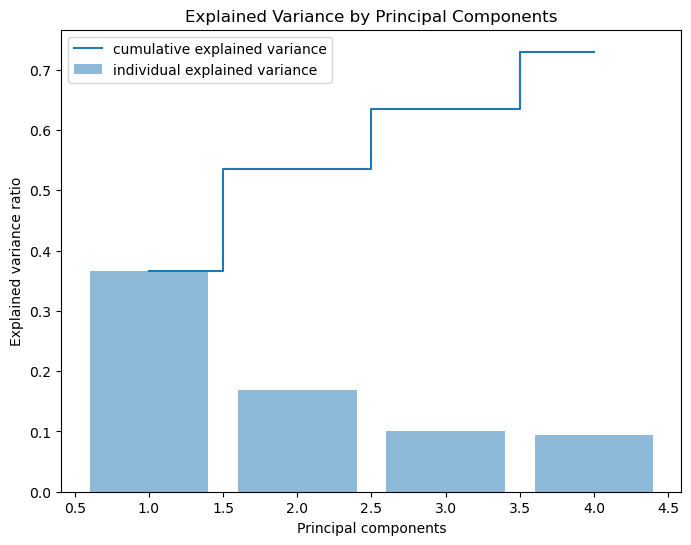

In [36]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

In [37]:
# Top 4 most significant variables
pca_components = pd.DataFrame(pca.components_, columns=data.columns[:pca.components_.shape[1]])
top_4_features = pca_components.abs().mean().sort_values(ascending=False)[:4].index

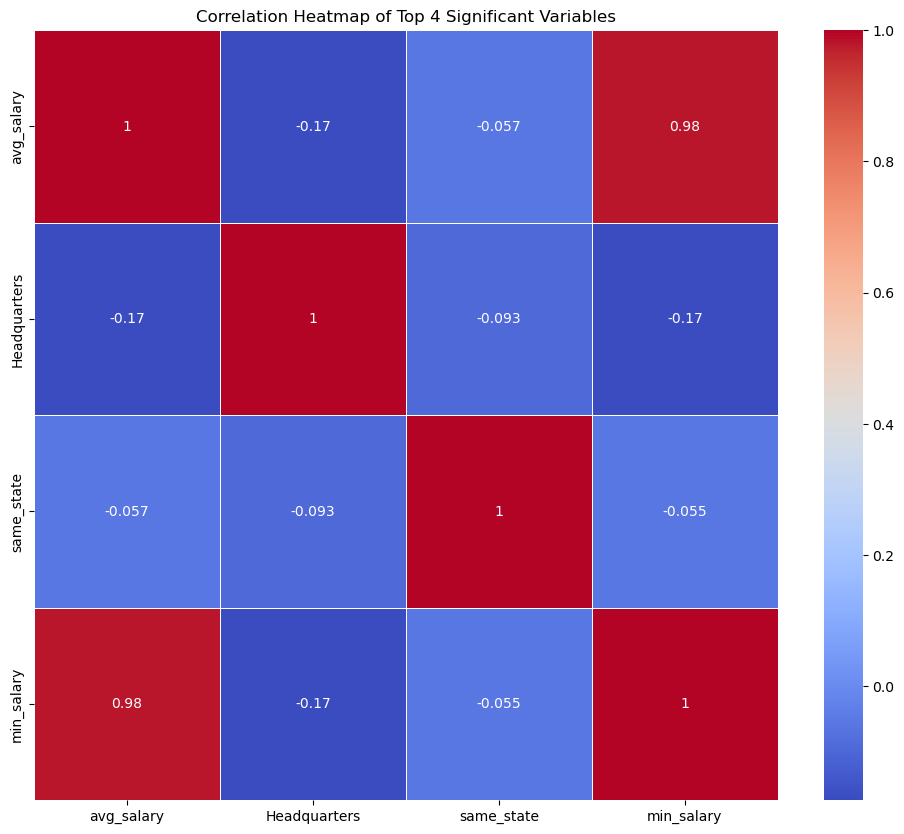

In [38]:
# Visualize top 4 variables
plt.figure(figsize=(12, 10))
sns.heatmap(data[top_4_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Top 4 Significant Variables')
plt.show()

In [39]:
# Print top 4 significant variables
print("Top 4 most statistically significant variables:")
print(top_4_features)

Top 4 most statistically significant variables:
Index(['avg_salary', 'Headquarters', 'same_state', 'min_salary'], dtype='object')


In [40]:
# Statistical significance report
numericData2 = data.select_dtypes(include=['float64', 'int64'])

report = pd.DataFrame({
    "Variable": numericData2.columns,
    "PC1 Loading": pca.components_[0],
    "PC2 Loading": pca.components_[1],
    "PC3 Loading": pca.components_[2],
    "PC4 Loading": pca.components_[3],
    "Mean Absolute Loading": np.mean(np.abs(pca.components_), axis=0)
})

In [41]:
report = report.sort_values(by="Mean Absolute Loading", ascending=False)

In [42]:
print("\nStatistical Significance Report:")
print(report)


Statistical Significance Report:
           Variable  PC1 Loading  PC2 Loading  PC3 Loading  PC4 Loading  \
9          desc_len     0.049479     0.177173     0.626033     0.376789   
3           Revenue    -0.121062    -0.080332     0.494118    -0.515599   
10         num_comp     0.050989     0.284310     0.364726    -0.484450   
7        same_state    -0.054330    -0.386246     0.440650     0.226270   
1            Rating     0.017993    -0.128362    -0.174591    -0.547387   
2              Size     0.091698     0.609644    -0.060787     0.000749   
8               age     0.046842     0.570329     0.027573     0.071801   
4        min_salary     0.487937    -0.073343     0.022291    -0.023569   
0   Salary Estimate     0.494683    -0.069661     0.021514    -0.020034   
6        avg_salary     0.494761    -0.067757     0.021074    -0.018462   
5        max_salary     0.488708    -0.062432     0.019777    -0.014539   

    Mean Absolute Loading  
9                0.307368  
3        

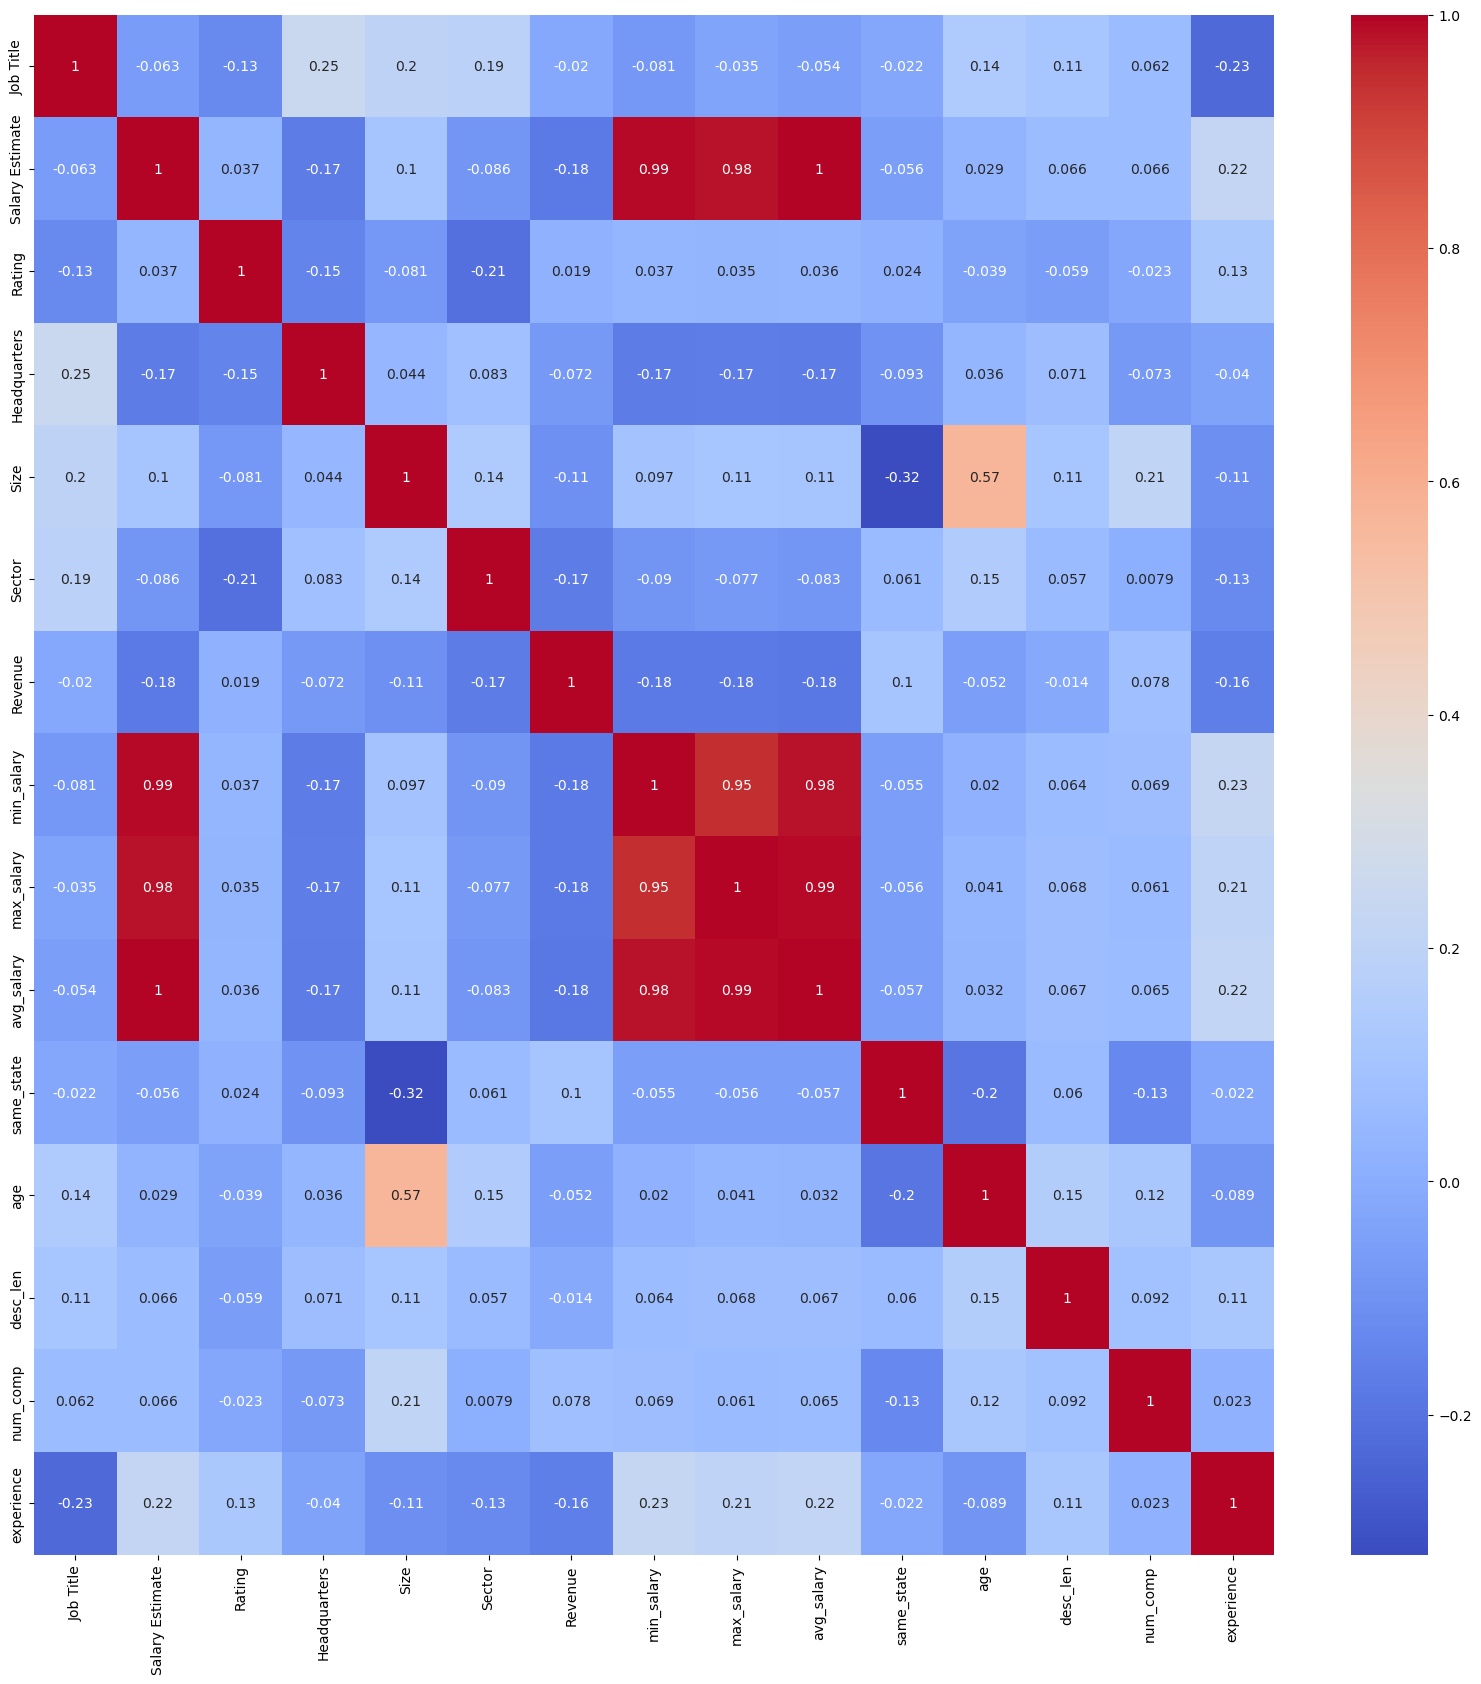

In [43]:
#Replot the Correlation Heatmap to review the numerical data after wrangling
numericalData = data.select_dtypes(include=['float64', 'int32','int64'])

plt.figure(figsize=(20, 20))
sns.heatmap(numericalData.corr(), annot=True, cmap='coolwarm')
plt.show()

# Split Data into Features and Target

Model Training Evaluation: 
- Grid Search for Hyperparameter Tuning: To find the best model parameters based on the lowest MAE and MSE.
- Training and Test Split: Ensuring a proper split of the dataset for unbiased evaluation.
- Model Validation: Using cross-validation, holdout validation, and time-based validation if applicable. 

In [46]:
# Split Data into Features and Target
X = data.drop('Salary Estimate', axis=1)
y = data['Salary Estimate']

In [47]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
labelEncoder = LabelEncoder()
for column in X_train.columns:
    if X_train[column].dtype == 'object':  # Check if the column is categorical
        # Fit on X_train and transform both X_train and X_test
        X_train[column] = labelEncoder.fit_transform(X_train[column])
        X_test[column] = labelEncoder.transform(X_test[column])

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [49]:
# Random Forest Regressor Model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [50]:
# Support Vector Regressor Model with GridSearchCV for hyperparameter tuning
svr = SVR()
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
svr_best = grid_search.best_estimator_
y_pred_svr = svr_best.predict(X_test)

In [51]:
# TensorFlow Model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

y_pred_nn = model.predict(X_test)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 19249.3750 - mae: 110.8648 - val_loss: 8036.4033 - val_mae: 71.5034
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6424.9990 - mae: 63.4064 - val_loss: 4265.2515 - val_mae: 52.4557
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4328.4785 - mae: 49.9946 - val_loss: 3108.0269 - val_mae: 42.5527
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3192.8440 - mae: 42.6418 - val_loss: 2608.2092 - val_mae: 37.9306
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2614.2258 - mae: 40.2394 - val_loss: 2254.3972 - val_mae: 37.2500
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2529.4792 - mae: 39.9050 - val_loss: 1880.4050 - val_mae: 31.5466
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1540.9917 - mae: 29.8071 - val_loss: 1204.7468 - val_mae: 27.9093
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1250.3386 - mae: 27.1128 - val_loss: 905.4449 - val_mae: 23.881

In [52]:
# Model Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

print("Linear Regression - Mean Absolute Error: {}".format(mae_lr))
print("Random Forest - Mean Absolute Error: {}".format(mae_rf))
print("Support Vector Regressor - Mean Absolute Error: {}".format(mae_svr))
print("Neural Network - Mean Absolute Error: {}".format(mae_nn))

Linear Regression - Mean Absolute Error: 9.786720700091945e-14
Random Forest - Mean Absolute Error: 0.9175235849056603
Support Vector Regressor - Mean Absolute Error: 0.03928104508828187
Neural Network - Mean Absolute Error: 9.346620289784557


In [53]:
# Determine the best model
mae_scores = {'Linear Regression': mae_lr, 'Random Forest': mae_rf, 'Support Vector Regressor': mae_svr, 'Neural Network': mae_nn}
best_model = min(mae_scores, key=mae_scores.get)

print("\nThe best performing model is: {}".format(best_model))


The best performing model is: Linear Regression


In [54]:
# Print Predicted vs Actual for Random Forest and Neural Network
results_rf = rf.predict(X_test[:5])
results_nn = model.predict(X_test[:5])

print("Random Forest - Predicted Salaries: ", results_rf)
print("Random Forest - Actual Salaries: ", y_test[:5].values)

print("Neural Network - Predicted Salaries: ", results_nn.flatten())
print("Neural Network - Actual Salaries: ", y_test[:5].values)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Random Forest - Predicted Salaries:  [ 93.725 104.465 155.27  119.195 250.85 ]
Random Forest - Actual Salaries:  [ 96.5 105.  156.5 119.5 250. ]
Neural Network - Predicted Salaries:  [110.59806 114.83596 162.94186 130.49347 252.24918]
Neural Network - Actual Salaries:  [ 96.5 105.  156.5 119.5 250. ]


# In Conclusion


After careful analysis of the data, the four variables with the most significant effect on estimated salary are the average salary, the company headquarters, whether the job seeker is in the same state or not, and the minimum salary for the position. Knowing the significance and effect of these factors on expected salary is important to a job seeker to identify patterns in posted jobs. For example, if a candidate knows that the minimum salary has a 0.98 correlation with the average salary, then the candidate can expect a higher salary for jobs with a higher minimum. 

Based on the lowest Mean Absolute Error (MAE) and Mean Squared Error (MSE), the Linear Regression model is the best performing model. Our success measurement was based off of the lowest MAE and MSE, and the MAE for the Linear Regression model is approximately 9.787e-14, which is by far the lowest MAE for the models we tested. We did test ensemble methods like Random Forest and Neural Network models; however, these models were not able to predict salaries as accurately as the Linear Regression model, as shown in the MAE values and the comparison of predicted and actual salaries from the Random Forest and Neural Network models.